# COMP 135 day 04: Linear Regression with Polynomial Features and Hyperparameter Selection on a fixed validation set

# Objectives

* Learn how to compute polynomial features
* Try out selecting the polynomial degree on a fixed validation set

* Learn how to use sklearn's built-in Polynomial feature transformer
* Learn how to use sklearn pipelines to compose useful elementary transformations and predictors


# Outline

* [Part 1: Linear Regression on Sine Wave dataset](#part1)
* [Part 2: Trying Polynomial Features + Linear Regression by hand](#part2)
* [Part 3: Selecting degree on Fixed Validation Set](#part3)
* [Part 4: Polynomial Feature transformer](#part4)
* [Part 5: Pipelines](#part5)


In [1]:
import numpy as np

# Import the pandas (data management library)
import pandas as pd

In [2]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [3]:
import sklearn.linear_model
import sklearn.pipeline

# Prepare a simple 'sine-wave' dataset

In [4]:
SEED = 12345
prng = np.random.RandomState(SEED)

In [5]:
def true_prediction_function(x):
    return np.sin(2.1 * x)

In [6]:
N = 9        # num training examples

x_N = np.linspace(-3, 3, N) + 0.09 * prng.randn(N)
y_N = true_prediction_function(x_N) + 0.06 * prng.randn(N)

In [7]:
M = 500      # num testing examples (to show "true" generalization)

x_te_M = np.linspace(-3.5, 3.5, M)
y_te_M = true_prediction_function(x_te_M) + 0.06 * prng.randn(M)

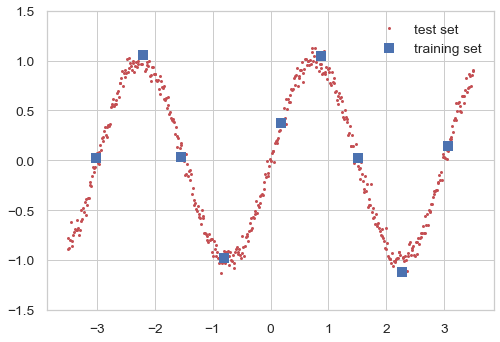

In [8]:
plt.plot(x_te_M, y_te_M, 'r.', label='test set')
plt.plot(x_N, y_N, 'bs', markersize=10, label='training set')

plt.legend(loc='upper right');
plt.ylim([-1.5, 1.5]);

<a id="part1"></a>

# Part 1: Linear Regression

First, let's try to fit plain old linear regression to this dataset.

In [39]:
lin_regr = sklearn.linear_model.LinearRegression()

### Exercise 1: Can you fit a linear regression and see what its predictions look like?

In [40]:
lin_regr.fit(x_N, y_N) # TODO fix me. Read error message below. Why does this break?

ValueError: Expected 2D array, got 1D array instead:
array=[-3.01842369 -2.2068951  -1.54674948 -0.80001573  0.17692025  0.87540652
  1.50836171  2.27535715  3.06921203].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Exercise 1b: Can you make predictions using the model above on the heldout test set?

In [51]:
yhat_te_M = np.zeros(M) # TODO something like "lin_regr.predict(x_te_M)""

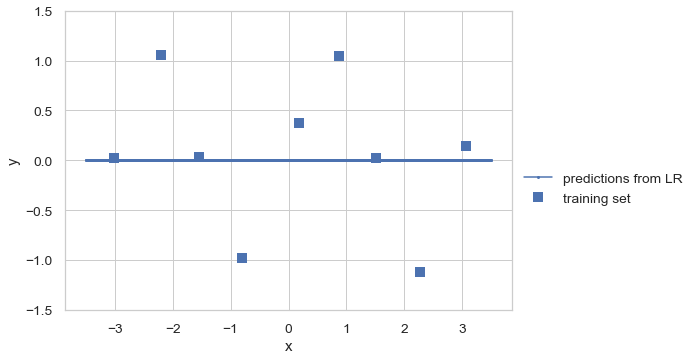

In [57]:
plt.plot(x_te_M, yhat_te_M, 'b.-', label='predictions from LR')
plt.plot(x_N, y_N, 'bs', markersize=10, label='training set')

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.ylim([-1.5, 1.5]);
plt.xlabel('x');
plt.ylabel('y');

# Part 2: Polynomial Features

Given our scalar feature $x_i \in \mathbb{R}$, we want to TRANSFORM it to a $F$-degree polynomial feature vector (of size $F+1$)

$$
\begin{align}
\phi_0(x_i) &= [1]
\\
\phi_1(x_i) &= [1 ~~ x_i]
\\
\phi_2(x_i) &= [1 ~~ x_i ~~ x_i^2]
\\
\phi_3(x_i) &= [1 ~~ x_i ~~ x_i^2 ~~ x_i^3] \\
\vdots \\
\phi_F(x_i) &= [1 ~~ x_i ~~ x_i^2 ~~ x_i^3 ~~ \ldots x_i^F]
\end{align}
$$

And then use these transformed features to do linear regression.

That is, we'll learn weights for each of the entries of the vector produced by $\phi_F$

### Exercise 2a: FIX this function so it returns a polynomial feature expansion like above

In [44]:
def make_poly_features(x_N1, degree=0):
    ''' Transform some 1-dim feature array into polynomial features
    
    Args
    ----
    x_N1 : 2D array, shape (N, 1)
        Input features of a 1d regression problem
    degree : int
        Indicates degree of polynomial
    
    Returns
    -------
    phi_NG : 2D array, shape (N, G)
        where G = degree + 1
    '''
    assert x_N1.ndim == 2
    N, _ = x_N1.shape
    
    if degree == 0:
        phi_NG = np.ones((N, 1))
    elif degree >= 1:
        # stack together horizontally a column of all ones and the x array
        phi_NG = np.hstack(
            [np.ones((N, 1))]
            + [x_N1.copy() for d in range(degree)]  # TODO WHAT TO DO HERE??
            )
    return phi_NG

In [45]:
make_poly_features(2*np.ones((3,1)), degree = 0)

array([[1.],
       [1.],
       [1.]])

In [46]:
make_poly_features(2*np.ones((3,1)), degree = 1)

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [47]:
make_poly_features(2*np.ones((3,1)), degree = 2)

array([[1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.]])

In [48]:
make_poly_features(2*np.ones((3,1)), degree = 4)

array([[1., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2.]])

# Part 3: Hyperparameter Selection for Linear Regression with Poly. Features





In [49]:
x_N1 = np.reshape(x_N, (N, 1))
x_te_M1 = np.reshape(x_te_M, (M, 1))

### Exercise 3a: Edit code below to properly do the polynomial feature transformation (use your function above)

degree 1 | train error 0.480 | test error 0.484
degree 2 | train error 0.480 | test error 0.484
degree 3 | train error 0.480 | test error 0.484
degree 4 | train error 0.480 | test error 0.484
degree 5 | train error 0.480 | test error 0.484
degree 6 | train error 0.480 | test error 0.484
degree 7 | train error 0.480 | test error 0.484
degree 8 | train error 0.480 | test error 0.484


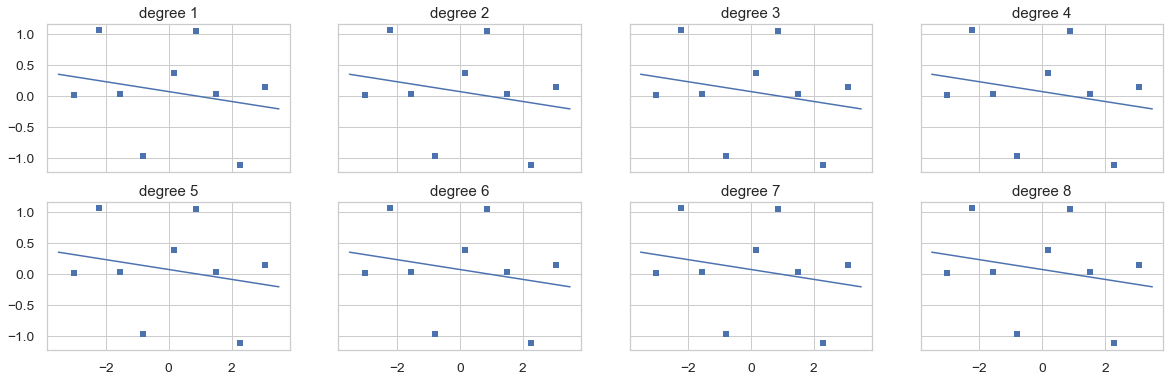

In [61]:
fig_h, ax_grid = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,6))

for ii, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8]):
    cur_ax = ax_grid.reshape((8,))[ii]

    lin_regr = sklearn.linear_model.LinearRegression()
    
    phi_NG = x_N1       # TODO fix to transform x with your function above!
    phi_te_MG = x_te_M1 # TODO fix to transform test features

    # Train the model
    lin_regr.fit(phi_NG, y_N)

    # Make predictions
    yhat_N = lin_regr.predict(phi_NG)
    yhat_te_M = lin_regr.predict(phi_te_MG)
    
    # Evaluate the ERROR on training set and test set
    tr_err = sklearn.metrics.mean_squared_error(y_N, yhat_N)
    te_err = sklearn.metrics.mean_squared_error(y_te_M, yhat_te_M)
    
    print("degree %d | train error %.3f | test error %.3f" % (degree, tr_err, te_err))
    
    # Plot the predictions on current axis
    cur_ax.plot(x_te_M1, yhat_te_M, 'b-');
    cur_ax.plot(x_N, y_N, 'bs');
    
    cur_ax.set_title('degree %d' % degree)

### Exercise 3b: Which degree offers the best fit to this test dataset?

# Part 4: Using sklearn's built in Polynomial feature transform

You can read up here:

<https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features>

Or dive in! 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

my_x_N1 = np.arange(3).reshape(3, 1)
print("Original Features my_x_N1")
print(my_x_N1)

Original Features my_x_N1
[[0]
 [1]
 [2]]


In [21]:
poly = PolynomialFeatures(2)
phi_NG = poly.fit_transform(my_x_N1) # call 'fit_transform' to perform the transformation

print("Transformed Features phi_NG using 2-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 2-degree polynomial
[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]]


In [22]:
poly = PolynomialFeatures(5)
phi_NG = poly.fit_transform(my_x_N1)

print("Transformed Features phi_NG using 5-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 5-degree polynomial
[[ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 16. 32.]]


Now try with more than one feature (e.g. each x vector is 2-dim.)

In [23]:
my_x_N2 = np.asarray([[0, 3], [1, 4], [2, 5]])
print("Original Features my_x_N2")
print(my_x_N2)

Original Features my_x_N2
[[0 3]
 [1 4]
 [2 5]]


In [24]:
poly = PolynomialFeatures(1)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 1-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 1-degree polynomial
[[1. 0. 3.]
 [1. 1. 4.]
 [1. 2. 5.]]


In [25]:
poly = PolynomialFeatures(2)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 2-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 2-degree polynomial
[[ 1.  0.  3.  0.  0.  9.]
 [ 1.  1.  4.  1.  4. 16.]
 [ 1.  2.  5.  4. 10. 25.]]


Conveniently, we can ask the feature transformer how it came up with these features

In [26]:
poly.get_feature_names(['a', 'b'])

['1', 'a', 'b', 'a^2', 'a b', 'b^2']

Now try 3-rd degree

In [27]:
poly = PolynomialFeatures(3)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 3-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 3-degree polynomial
[[  1.   0.   3.   0.   0.   9.   0.   0.   0.  27.]
 [  1.   1.   4.   1.   4.  16.   1.   4.  16.  64.]
 [  1.   2.   5.   4.  10.  25.   8.  20.  50. 125.]]


In [28]:
poly.get_feature_names(['a', 'b'])

['1', 'a', 'b', 'a^2', 'a b', 'b^2', 'a^3', 'a^2 b', 'a b^2', 'b^3']

# Part 5: Using sklearn's built in Pipeline system

Often, we want to compose together some feature transformations and some predictor (like Linear Regression)

Sklearn lets us do that easily with a Pipeline

Read up here: 

<https://scikit-learn.org/stable/modules/compose.html#pipeline>

The key advantages of pipelines here are 

**Convenience** 

A pipeline is one object that handles everything

* every time we call fit, we first transform the raw features "x" into the transformed ones "phi", and then we do linear regression fitting using those transformed features
* every time we call predict, we first transform the raw features "x" into the transformed ones "phi", and then use linear regression to predict

Otherwise, we'd have to call `make_poly_features' so many times.

**Correctness**

Pipelines help us avoid having data leaks (e.g. have test data impact the transformation we learn). More about this later in the course.

To construct a pipeline, we just provide a list of steps.

Each STEP is just a tuple:
* first entry is the string name of the step (can be anything you want)
* second entry is the constructed sklearn estimator that will implement that step

In [29]:
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures()),
    ("step2", sklearn.linear_model.LinearRegression()),
    ])

In [30]:
pipeline

Pipeline(steps=[('step1', PolynomialFeatures()), ('step2', LinearRegression())])

Now, we can use a pipeline like so:

degree   1 | train error      0.480 | test error      0.484
degree   2 | train error      0.479 | test error      0.485
degree   3 | train error      0.478 | test error      0.493
degree   4 | train error      0.472 | test error      0.508
degree   5 | train error      0.026 | test error      0.849
degree   6 | train error      0.025 | test error      0.901
degree   7 | train error      0.000 | test error      0.427
degree   8 | train error      0.000 | test error      0.471
degree   9 | train error      0.000 | test error    194.735
degree  10 | train error      0.000 | test error    262.800
degree  11 | train error      0.000 | test error  16535.414
degree  12 | train error      0.000 | test error  28942.687


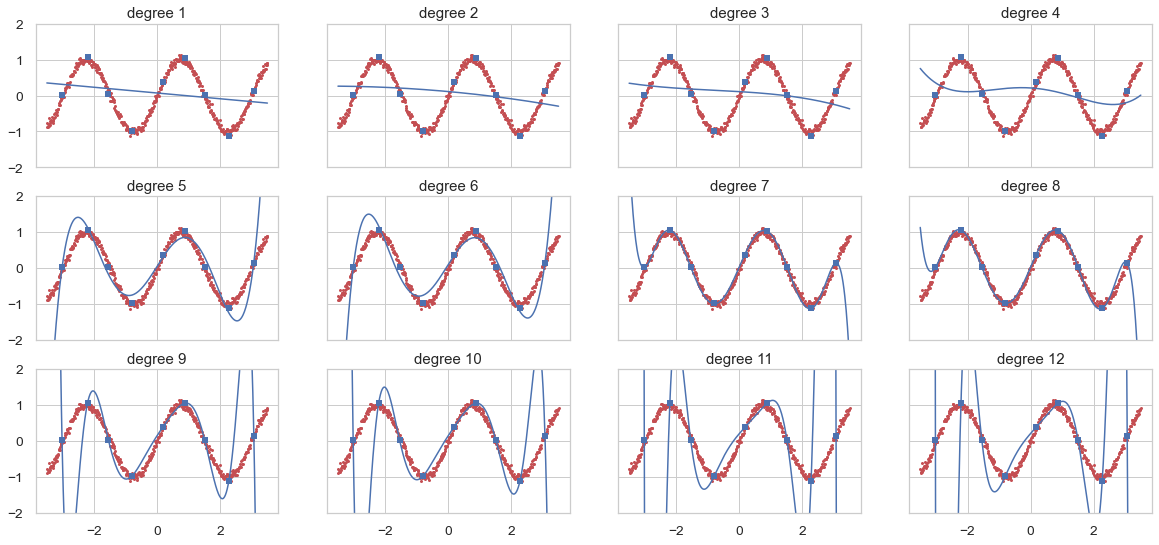

In [37]:
fig_h, ax_grid = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(20,9))

for ii, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):

    cur_ax = ax_grid.reshape((12,))[ii]
    
    pipeline = sklearn.pipeline.Pipeline([
        ("step1", sklearn.preprocessing.PolynomialFeatures(degree)), # create custom Poly featurizer
        ("step2", sklearn.linear_model.LinearRegression()),
        ])

    # Train the model
    pipeline.fit(x_N1, y_N)                # Can use raw x here, unlike above

    # Make predictions
    yhat_N = pipeline.predict(x_N1)        # Can use raw x here too!
    yhat_te_M = pipeline.predict(x_te_M1)
    
    # Evaluate the ERROR on training set and test set
    tr_err = sklearn.metrics.mean_squared_error(y_N, yhat_N)
    te_err = sklearn.metrics.mean_squared_error(y_te_M, yhat_te_M)
    
    print("degree %3d | train error % 10.3f | test error % 10.3f" % (degree, tr_err, te_err))
    
    # Plot the predictions
    cur_ax.plot(x_te_M1, y_te_M, 'r.');
    cur_ax.plot(x_te_M1, yhat_te_M, 'b-');
    cur_ax.plot(x_N, y_N, 'bs');
    cur_ax.set_title('degree %d' % degree);
    cur_ax.set_ylim([-2, 2]);

### Exercise 5a: Which degree offers the best fit to this heldout dataset (in red)?